In [1]:
import random
import helpers
import numpy as np
import pandas as pd
from copy import copy
from genetic import Experiment,Population,Chromosome,Gen
from joblib import Parallel, delayed,parallel_backend
import time
from ExperimentBase import ExperimentBaseModel,Transformer,CAModel
from Visualization import Visualization

In [2]:
class Experiment1(ExperimentBaseModel):
    def __init__(self,data,name,path):
        ExperimentBaseModel.__init__(self,data,name,path)
        
    def getTotalMatch(self,phenotype,goal):
        totalPos = 0
        totalNeg = 0
        matchProportion = eval(phenotype)
        for row in self.matrix:
            res = matchProportion(row[0])
            if row[2] == goal:
                totalPos += res * row[1]
            else:
                totalNeg -= res * row[1]
        total = totalPos+(totalNeg * 0.5)
        return total
    
    def setup(self):
        self.radious = 2
        self.neighborhood = helpers.moore([self.radious,self.radious])
        self.mutationRate = .2
        self.noChromosomes = 5
        self.noIterations = 20
        super().setup()

dataframe = pd.read_csv("data/2_square.csv")
data  = dataframe.values
exp = Experiment1(data,"Experiment1","path")
exp.run()

In [3]:
data  = np.load("data/wildfire.npy")
exp2 = Experiment1(data[:],"Experiment2","2dfire")
exp2.run()

99.33066892623901
100.24372291564941
{'generation': 1, 'elapsedTime': 50.15299701690674}
{'generation': 2, 'elapsedTime': 55.39395594596863}
{'generation': 3, 'elapsedTime': 57.56044793128967}
{'generation': 4, 'elapsedTime': 56.47439384460449}
{'generation': 5, 'elapsedTime': 57.188164949417114}
{'generation': 6, 'elapsedTime': 65.25905680656433}
{'generation': 7, 'elapsedTime': 58.06652307510376}
{'generation': 8, 'elapsedTime': 58.31337094306946}
{'generation': 9, 'elapsedTime': 61.557461977005005}
{'generation': 10, 'elapsedTime': 60.18631196022034}
{'generation': 11, 'elapsedTime': 67.94032883644104}
{'generation': 12, 'elapsedTime': 61.08276700973511}
{'generation': 13, 'elapsedTime': 73.36939287185669}
{'generation': 14, 'elapsedTime': 66.45877695083618}
{'generation': 15, 'elapsedTime': 62.03614807128906}
{'generation': 16, 'elapsedTime': 63.59155297279358}
{'generation': 17, 'elapsedTime': 77.03694796562195}
{'generation': 18, 'elapsedTime': 68.84567713737488}
{'generation': 1

In [4]:
transformer = Transformer(exp2)
model = transformer.getModel()

In [5]:
transformer.lmstr

{0: 'lambda x: x[0] in {1} and x[1] in {0} and x[2] in {0} and x[3] in {0} and x[4] in {1} and x[5] in {1} and x[6] in {1} and x[7] in {0} and x[8] in {1} and x[9] in {1} and x[10] in {2} and x[11] in {0} and x[12] in {0} and x[13] in {0} and x[14] in {-1} and x[15] in {0} and x[16] in {2} and x[17] in {1} and x[18] in {0} and x[19] in {0} and x[20] in {2} and x[21] in {1} and x[22] in {0} and x[23] in {1} and x[24] in {1}',
 1: 'lambda x: x[0] in {0} and x[1] in {2} and x[2] in {-1} and x[3] in {0} and x[4] in {1} and x[5] in {1} and x[6] in {0} and x[7] in {-1} and x[8] in {1} and x[9] in {1} and x[10] in {0} and x[11] in {0} and x[12] in {1} and x[13] in {1} and x[14] in {1} and x[15] in {1} and x[16] in {0} and x[17] in {1} and x[18] in {2} and x[19] in {1} and x[20] in {1} and x[21] in {1} and x[22] in {-1} and x[23] in {2} and x[24] in {1}',
 2: 'lambda x: x[0] in {2} and x[1] in {-1} and x[2] in {2} and x[3] in {2} and x[4] in {0} and x[5] in {0} and x[6] in {0} and x[7] in {0} 

In [6]:
prediction = []
for it in model.run(data[0],10):
    prediction.append(it[1])

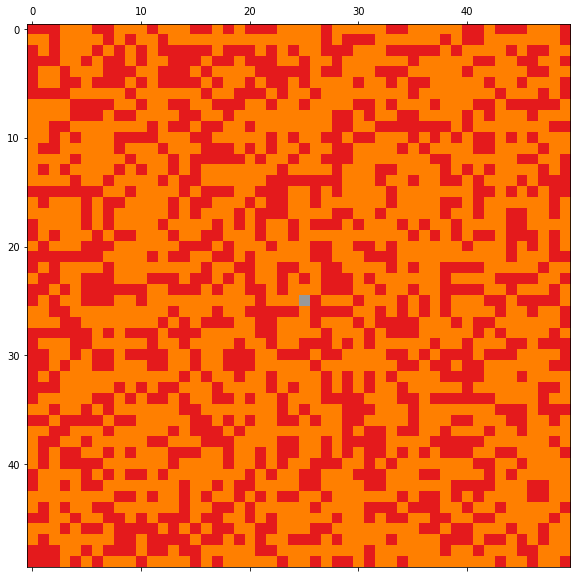

In [7]:
helpers.animate(prediction)

In [8]:
visualization = Visualization("2dfire/13_12_19_12_59_01")

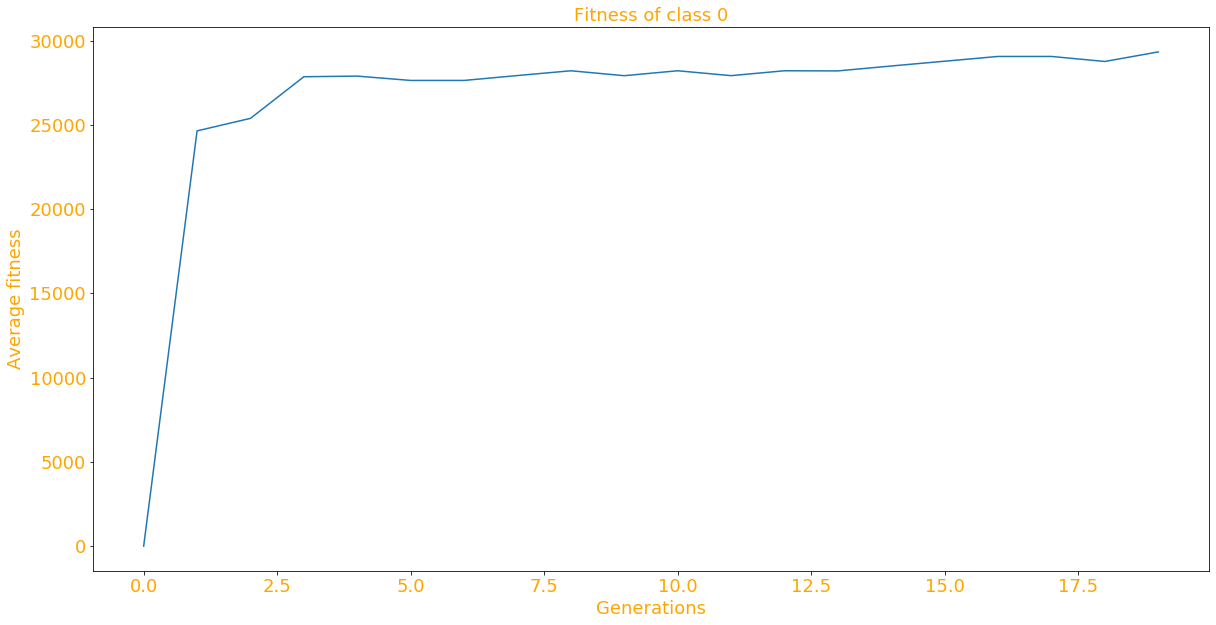

In [9]:
visualization.getFitnessGraph("0")

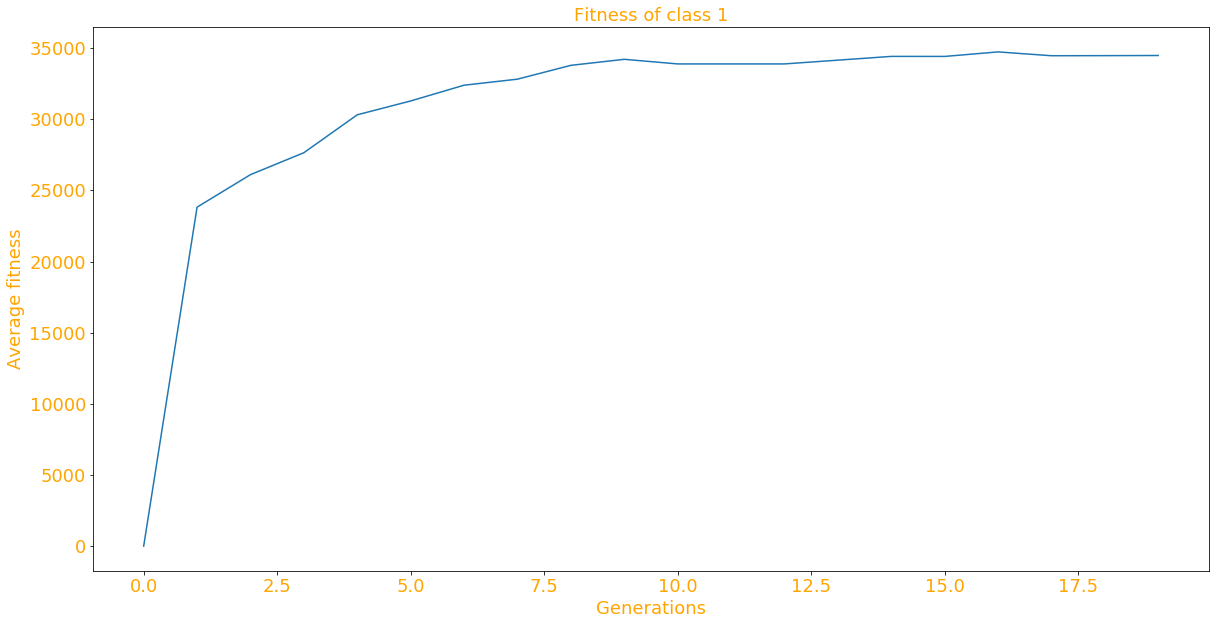

In [10]:
visualization.getFitnessGraph("1")

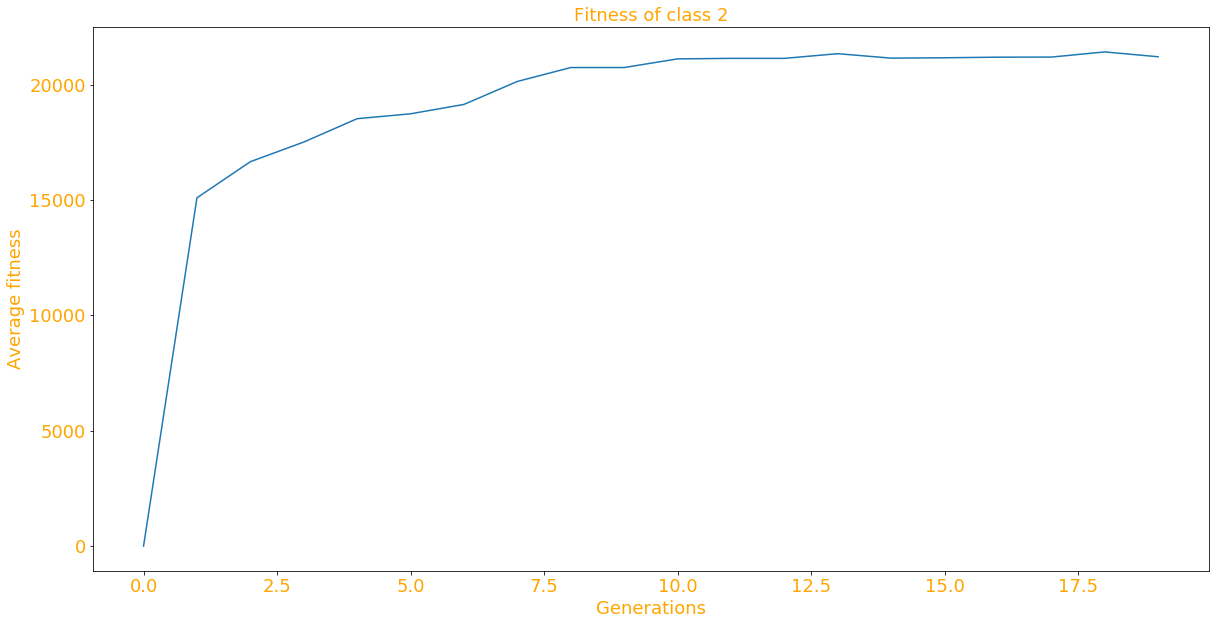

In [11]:
visualization.getFitnessGraph("2")